In [ ]:
!pip install img2vec_pytorch

In [1]:
GROUND_TRUTH_PATH = 'test_data/test.txt'
TEST_DATA_PATH = 'test_data/test_images'
HERO_IMAGE_PATH = 'hero_images'

In [2]:
with open(GROUND_TRUTH_PATH, 'r') as f:
    lines = f.readlines()
    lines = [x.strip() for x in lines]
ground_truth = list(map(lambda x: x.split('\t'), lines))
ground_truth[0]

['Jinx_630613568339321_round1_Dr.-Mundo_06-04-2021.mp4_65_1.jpg', 'Jinx']

In [3]:
import os
import utils
from PIL import Image

Ashe_231705051716794_round3_Ashe_06-07-2021.mp4_26_2.jpg Ashe


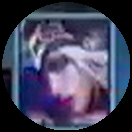

In [4]:
f, label = ground_truth[12]
print(f, label)
timg = Image.open(os.path.join(TEST_DATA_PATH, f))
limg = Image.open(os.path.join(HERO_IMAGE_PATH, label + ".png"))
utils.process_test_image(timg)

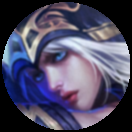

In [5]:
utils.process_train_image(limg)

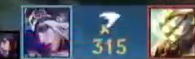

In [6]:
import numpy as np
import cv2
def detect_circle_avatar(org_img: Image, padding=5, min_radius=20):
    img = np.array(org_img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blurred = cv2.bilateralFilter(gray, 11, 30, 30)

    # tune circles size
    detected_circles = cv2.HoughCircles(gray_blurred,
                            cv2.HOUGH_GRADIENT, 1,
                            param1=50,
                            param2=30,
                            minDist=img.shape[1] // 2,
                            minRadius=img.shape[0] // 4,
                            maxRadius=img.shape[0] // 2)

    if detected_circles is not None:
        # Convert the circle parameters a, b and r to integers.
        detected_circles = np.uint16(np.around(detected_circles))

        for pt in detected_circles[0, :]:
            a, b, r = int(pt[0]), int(pt[1]), int(pt[2])
            if a - r > img.shape[1] // 2:
                continue
            # img = img[max(b-r, 0):min(b+r+padding, img.shape[0]), max(a-r, 0):min(a+r+padding, img.shape[1])]

            # Draw the circumference of the circle.
            cv2.circle(img, (a, b), r, (0, 255, 0), 2)
            # Draw a small circle (of radius 1) to show the center.
            cv2.circle(img, (a, b), 1, (0, 0, 255), 3)

            return Image.fromarray(img), True
    return org_img, False
detect_circle_avatar(timg, min_radius=20)[0]

In [7]:
timg.size

(195, 59)

In [8]:
from img2vec_pytorch import Img2Vec
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
print("Getting vectors for test images...\n")
img2vec = Img2Vec( model='resnet18')

# For each test image, we store the filename and vector as key, value in a dictionary
pics = {}
for file in os.listdir(HERO_IMAGE_PATH):
    if not file.endswith(".png"):
        continue

    img = Image.open(os.path.join(HERO_IMAGE_PATH, file))
    img = utils.process_train_image(img)
    vec = img2vec.get_vec(img)
    pics[file[:-4]] = vec

Getting vectors for test images...



f:\Anaconda3\envs\test_tool\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
f:\Anaconda3\envs\test_tool\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
acc = 0
for idx, (pic_name, label) in enumerate(ground_truth):
    if not pic_name.endswith(".jpg"):
        continue

    test_embed = img2vec.get_vec(utils.process_test_image(Image.open(os.path.join(TEST_DATA_PATH, pic_name))))

    sims = {}
    for key in list(pics.keys()):
        sims[key] = cosine_similarity(test_embed.reshape((1, -1)), pics[key].reshape((1, -1)))[0][0]

    d_view = [(v, k) for k, v in sims.items()]
    d_view.sort(reverse=True)

    if label == d_view[0][1]:
        acc += 1
    else:
        print(idx, label, d_view)

print(acc / len(os.listdir(TEST_DATA_PATH)))

1 Darius [(0.7760414, 'Brand'), (0.7719939, 'Dr._Mundo'), (0.76472265, 'Volibear'), (0.7617148, 'Pyke'), (0.7604788, 'Pantheon'), (0.75149864, 'Samira'), (0.74737483, 'Singed'), (0.7357966, 'Rakan'), (0.73096347, 'Yuumi'), (0.7308024, 'Draven'), (0.729231, 'Renekton'), (0.7258107, 'Twitch'), (0.725096, 'Thresh'), (0.7221782, 'Amumu'), (0.72184664, 'Master_Yi'), (0.72134876, 'Tristana'), (0.72110873, 'Blitzcrank'), (0.72104156, 'Corki'), (0.72103345, 'Ekko'), (0.71760154, 'Diana'), (0.71595967, 'Olaf'), (0.7112019, 'Ziggs'), (0.7058936, 'Tryndamere'), (0.7055317, 'Jayce'), (0.70439684, 'Jax'), (0.70231247, 'Fizz'), (0.70081365, 'Hecarim'), (0.6983969, 'Nunu'), (0.6974023, 'Senna'), (0.696789, 'Braum'), (0.695549, 'Soraka'), (0.6949241, 'Zeri'), (0.693931, 'Karma'), (0.69341063, 'Nautilus'), (0.69339645, 'Yone'), (0.6929671, 'Yasuo'), (0.69235724, 'Urgot'), (0.6891584, 'Camille'), (0.68915606, 'Alistar'), (0.6887765, 'Teemo'), (0.68865156, 'KhaZix'), (0.6868593, 'Zoe'), (0.686641, 'Nasus